In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import scipy.signal as signal
import datetime as dt

from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

sys.path.append("/home/aldo/notebooks/code/")
import sxrf_download

The following packages are not installed:
['cdflib>=1.3.2']
To install sunpy with these dependencies use `pip install sunpy[timeseries]` or `pip install sunpy[all]` for all extras. 
If you installed sunpy via conda, please report this to the community channel: https://matrix.to/#/#sunpy:openastronomy.org [sunpy.util.sysinfo]


In [2]:
xrdata = sxrf_download.sunpy_xrf("2025-03-07", "2025-05-26")

Files Downloaded:   0%|          | 0/31 [00:00<?, ?file/s]

In [9]:
xrdata.head()

,GOES-16_short,GOES-16_long,xrsa_quality,xrsb_quality
DateTime,,,,
2025-03-07 00:00:00,9.493029e-09,8.161248e-07,0,0
2025-03-07 00:01:00,1.189827e-08,8.433024e-07,0,0
2025-03-07 00:02:00,1.250495e-08,8.506790e-07,0,0
2025-03-07 00:03:00,1.249528e-08,8.573184e-07,0,0
2025-03-07 00:04:00,1.236695e-08,8.720734e-07,0,0


In [43]:
!ls /data/pavnet/2025/PLO//



ANTAR_RAW_99996_18_01_2025_17_59_41__99996.txt
ANTAR_RAW_99996_18_01_2025_17_59_41__99996.txt.tar.gz
datos_feb
datosraw
PLO_AMPLITUDE_2025-01-07-to-2025-02-04.csv
PLO_AMPLITUDE_2025-01-07-to-2025-06-18.csv
PLO_AMPLITUDE_2025-02-21-to-2025-03-21.csv
plot_mar
spheric-filtering-comparison.png


In [44]:
path = "/data/pavnet/2025/PLO//PLO_AMPLITUDE_2025-01-07-to-2025-06-18.csv"
path1 = "/data/pavnet/2025/PLO//PLO_AMPLITUDE_2025-02-21-to-2025-03-21.csv"


In [7]:
!ls $path2

09042025  data	 data270525
22052025  data1  PIU_AMPLITUDE_2024-12-17-to-2025-02-02.csv


In [53]:
piudf = pd.read_csv(path, index_col=[0], parse_dates=True)
piudf2 = pd.read_csv(path1, index_col=[0], parse_dates=True)
piudf = pd.concat((piudf, piudf2))

In [54]:
piudf.sort_index(inplace=True)
piudf.head()

,NPM,NAA,NLK,NLM,NAU,NPM-filt,NAA-filt,NLK-filt,NLM-filt,NAU-filt
2025-01-07 16:23:48,0.451511,2.518778,0.754013,0.243970,0.000009,0.451511,2.518778,0.754013,0.243970,0.000009
2025-01-07 16:24:00,0.429420,2.449923,0.733976,0.245086,0.000010,0.465862,2.464190,0.748586,0.266977,0.000009
2025-01-07 16:24:10,0.414024,2.285808,0.741972,0.232529,0.000006,0.480471,2.417372,0.744095,0.285416,0.000008
2025-01-07 16:24:50,0.552305,2.299871,0.735656,0.825972,0.000009,0.495461,2.384348,0.741259,0.297119,0.000008
2025-01-07 16:25:15,0.488470,2.505251,0.720633,0.233255,0.000008,0.510723,2.368131,0.740407,0.303721,0.000008


In [55]:
df1m = piudf.resample('1T').mean()
df1m.head(10)

/tmp/ipykernel_833389/3866379178.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df1m = piudf.resample('1T').mean()


,NPM,NAA,NLK,NLM,NAU,NPM-filt,NAA-filt,NLK-filt,NLM-filt,NAU-filt
2025-01-07 16:23:00,0.451511,2.518778,0.754013,0.243970,0.000009,0.451511,2.518778,0.754013,0.243970,0.000009
2025-01-07 16:24:00,0.465250,2.345201,0.737201,0.434529,0.000008,0.480598,2.421970,0.744646,0.283171,0.000009
2025-01-07 16:25:00,0.530173,2.409288,0.750358,0.241322,0.000008,0.539440,2.388688,0.743917,0.335969,0.000008
2025-01-07 16:26:00,0.602216,2.460036,0.746945,0.639286,0.000008,0.595683,2.459321,0.741898,0.515271,0.000008
2025-01-07 16:27:00,0.658098,2.453849,0.721259,0.228436,0.000006,0.654857,2.456322,0.730031,0.352919,0.000006
2025-01-07 16:28:00,0.669286,2.474743,0.742400,0.255134,0.000007,0.688587,2.445236,0.744024,0.178016,0.000007
2025-01-07 16:29:00,0.707864,2.468052,0.736720,0.249754,0.000008,0.699568,2.482032,0.738496,0.268090,0.000008
2025-01-07 16:30:00,0.787449,2.486357,0.751895,0.260743,0.000006,0.787672,2.479076,0.745423,0.248527,0.000006
2025-01-07 16:31:00,0.792277,2.439716,0.748547,0.253689,0.000007,0.790538,2.416899,0.744616,0.259689,0.000008
2025-01-07 16:32:00,0.787992,2.088435,0.686440,0.330262,0.000010,0.794417,2.126184,0.701414,0.338168,0.000009


In [56]:
# days in data (unique)
days = np.unique(piudf.index.date)

In [57]:
# pivot to matrix: X(time) x Y(date)
df1m['date'] = df1m.index.date
df1m['time'] = df1m.index.time
piudfm = df1m.pivot_table(index='date', columns='time', values='NAA-filt')

In [58]:
piudfm

time,00:00:00,00:01:00,00:02:00,00:03:00,00:04:00,00:05:00,00:06:00,00:07:00,00:08:00,00:09:00,...,23:50:00,23:51:00,23:52:00,23:53:00,23:54:00,23:55:00,23:56:00,23:57:00,23:58:00,23:59:00
date,,,,,,,,,,,,,,,,,,,,,
2025-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.368309,2.456138,2.426378,2.415600,2.374207,2.472500,2.361904,2.419330,2.446060,2.438709
2025-01-08,2.471445,2.413574,2.402438,2.428166,2.452332,2.391127,2.392948,2.453816,2.424952,2.436319,...,2.170768,2.216092,2.143557,2.210942,2.119609,0.485347,0.850966,2.245568,2.129413,2.128203
2025-01-09,2.102076,1.967318,2.019937,1.980836,1.977300,1.954957,1.879877,1.798446,1.849317,1.861057,...,2.092201,2.064422,2.047024,2.038019,1.959413,2.006553,1.996278,1.949545,1.966546,1.996770
2025-01-10,2.008608,1.939913,1.930668,1.916962,1.884652,1.893743,1.837154,1.815128,1.792553,1.778901,...,1.951957,1.858002,1.872592,1.884677,1.852879,1.862885,1.789959,1.747938,1.793746,1.765261
2025-01-11,1.740512,1.736282,1.653851,1.697074,1.691559,1.701666,1.608682,1.609242,1.636127,1.631588,...,1.528560,1.585063,1.522294,1.492627,1.479412,1.463085,1.372950,1.362149,1.329279,1.310427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,1.241735,1.241619,1.199744,1.214763,1.263516,1.220850,1.255144,1.251425,1.295331,1.236178,...,0.958230,0.946740,0.969814,0.970584,0.966625,1.008615,1.022878,1.035295,1.063117,1.054535
2025-06-10,1.059058,1.042073,1.101145,1.080321,1.094090,1.092150,1.086720,1.091113,1.102214,1.123162,...,0.934107,0.921042,0.935203,0.939216,0.952825,0.978165,0.996627,0.981909,0.983117,0.973541
2025-06-11,0.990029,0.983281,1.017686,0.978976,1.004309,1.063279,1.031087,1.037072,1.050892,1.085979,...,0.862652,0.878047,0.882955,0.893782,0.917196,0.941005,0.961603,0.959126,0.971692,0.995281


In [54]:
piudfm

time,00:00:00,00:01:00,00:02:00,00:03:00,00:04:00,00:05:00,00:06:00,00:07:00,00:08:00,00:09:00,...,23:50:00,23:51:00,23:52:00,23:53:00,23:54:00,23:55:00,23:56:00,23:57:00,23:58:00,23:59:00
date,,,,,,,,,,,,,,,,,,,,,
2024-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.069147,0.066400,0.082715,0.090192,0.114470,0.124934,0.137400,0.150961,0.179900,0.196517
2024-12-18,0.205158,0.252475,0.269004,0.270718,0.287352,0.312947,0.340017,0.352839,0.409128,0.397068,...,0.258428,0.302562,0.276904,0.315899,0.308848,0.342470,0.388687,0.422508,0.439835,0.476089
2024-12-19,0.470940,0.477089,0.508667,0.508142,0.511467,0.525414,0.544064,0.568860,0.576449,0.614311,...,0.469651,0.481538,0.495209,0.551218,0.569765,0.590625,0.620570,0.652223,0.666967,0.695801
2024-12-20,0.738008,0.765931,0.781949,0.827195,0.801658,0.821690,0.831033,0.835909,0.849309,0.875424,...,0.180965,0.184005,0.164487,0.187262,0.177206,0.178802,0.195626,0.196011,0.217172,0.252616
2024-12-21,0.269267,0.273084,0.279596,0.291113,0.291761,0.311007,0.310753,0.310807,0.302890,0.315763,...,0.273228,0.245604,0.227983,0.192326,0.211231,0.169026,0.148050,0.168002,0.193624,0.197860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-23,0.786399,0.773204,0.776706,0.788441,0.739278,0.763044,0.686884,0.723961,0.710436,0.662537,...,0.931059,1.019005,0.949443,0.935861,0.906359,0.946662,0.905027,0.875401,0.853687,0.914077
2025-05-24,0.907395,0.881503,0.794884,0.875186,0.823143,0.720960,0.845458,0.779588,0.753729,0.803914,...,0.913230,0.925263,0.899637,0.917233,0.917176,0.941919,0.954068,0.874870,0.883463,0.857126
2025-05-25,0.849902,0.855991,0.861608,0.811205,0.840996,0.829580,0.799267,0.857213,0.734884,0.649363,...,0.825429,0.809287,0.763415,0.827345,0.817716,0.813770,0.758334,0.720035,0.719308,0.803284


In [59]:
naa_mean = np.mean(piudfm.values, axis=0)
timeh = np.linspace(0,24,piudfm.shape[1])

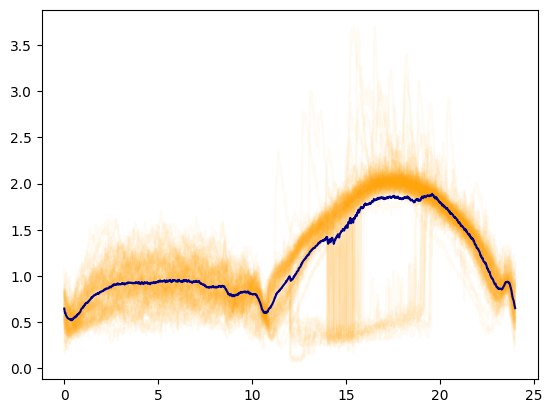

In [56]:
for d in piudfm.index:
    plt.plot(timeh, piudfm.loc[d,:], color="orange", alpha=0.05)
plt.plot(timeh, naa_mean, color="darkblue")    

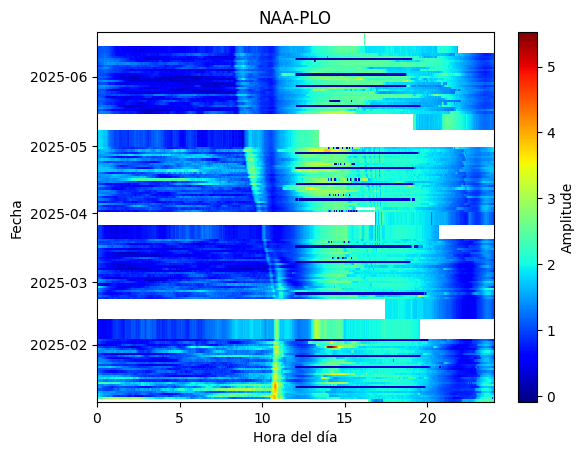

In [60]:
plt.pcolormesh(timeh, piudfm.index, piudfm.values, cmap="jet", shading="nearest")
plt.title("NAA-PLO")
plt.xlabel("Hora del día")
plt.ylabel("Fecha")
cb = plt.colorbar()
cb.set_label("Amplitude",)

#plt.ylim(dt.date(2025,4,20),dt.date(2025,4,25))

<Axes: xlabel='time'>

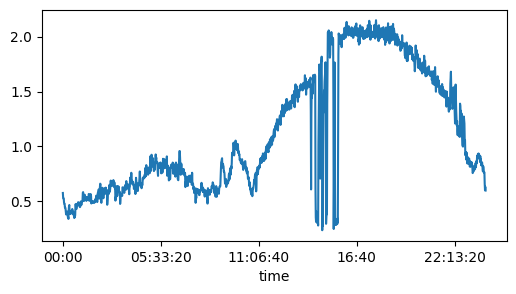

In [62]:
plt.figure(figsize=(6,3))
piudfm.loc[dt.date(2025,4,23), :].plot()

Text(0.5, 1.0, 'NAA-PIU [dB]')

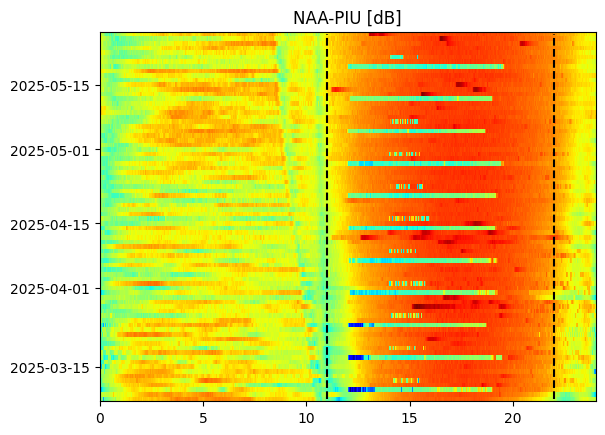

In [135]:
# amp to dB
piudfmdb = 20*np.log10(piudfm)
plt.pcolormesh(timeh, piudfmdb.index, piudfmdb.values, cmap="jet", 
               )
plt.vlines([11,22], piudfmdb.index[0],piudfmdb.index[-1],color="k", linestyle="--")
plt.title("NAA-PIU [dB]")

In [80]:
nday , nmin = piudfmdb.shape

<Axes: xlabel='DateTime'>

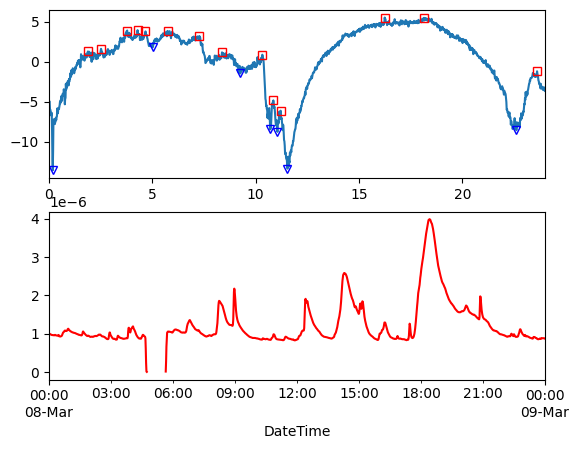

In [192]:
ii=0
y = piudfmdb.iloc[ii,:].values
x = timeh
ax = plt.subplot(211)
plt.plot(x,y)
pi, _ = signal.find_peaks(y, distance=20,prominence=1, width=0)
pi_dw, _ = signal.find_peaks(-y, distance=20,prominence=2)
plt.plot(x[pi],y[pi], 'rs', markerfacecolor="none")
plt.plot(x[pi_dw],y[pi_dw], 'vb', markerfacecolor="none")
plt.xlim(0,24)
ax2 = plt.subplot(212)

xrdata.loc[piudfmdb.index[ii]:piudfmdb.index[ii]+dt.timedelta(hours=24), 
"GOES-16_long"].plot(ax=ax2, color="r")

#plt.xlim(20,25)

In [93]:

piuday = piudfmdb.loc[:, dt.time(hour=12): dt.time(hour=22)].copy()

In [ ]:
found_peaks = []
dh = piuday.columns
for dd in piuday.index:
    y = piuday.loc[dd,:]
    pi, _ = signal.find_peaks(y, distance=20)
    h = dh[]
    found_peaks.append((piuday.columns, dd))

plt.pcolormesh(timeh, piudfmdb.index, piudfmdb.values, cmap="jet", 
   

In [142]:
dfdb = 20*np.log10(df1m["NAA-filt"])

In [147]:
naaday = dfdb.between_time("12:00","22:00").copy()

(np.float64(20155.0), np.float64(20156.0))

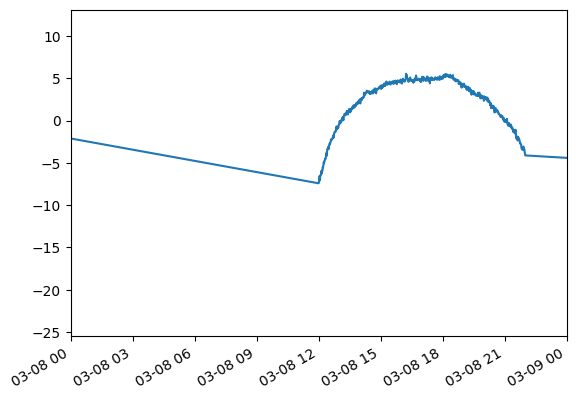

In [149]:
naaday.plot()
plt.xlim(dt.date(2025,3,8),dt.date(2025,3,9))

In [160]:
print(f"original shape (wholetime): {naaday.shape}\nOnly day shape: {df1m.shape}")

original shape (wholetime): (48681,)
Only day shape: (116640, 12)


In [200]:
day_peaks, _ = signal.find_peaks(naaday, distance=30,prominence=1, width=10)
pi_dw, _ = signal.find_peaks(-naaday, distance=20,prominence=2)
idx1 =  naaday.index[day_peaks]
idx2 =  naaday.index[pi_dw]
ydate = naaday.index[day_peaks].date
xtime = [t.hour + t.minute/60 for t in naaday.index[day_peaks].time]

In [197]:
# pivot to matrix: X(time) x Y(date)
dfday = pd.DataFrame(naaday)
# States 
# 1: fall of signal
# 2: normal
# 3: flareactive
dfday["state"] = np.ones()*2 # set default 
dfday['date'] = dfday.index.date
dfday['time'] = dfday.index.time
piudfm = dfday.pivot_table(index='date', columns='time', values='NAA-filt')

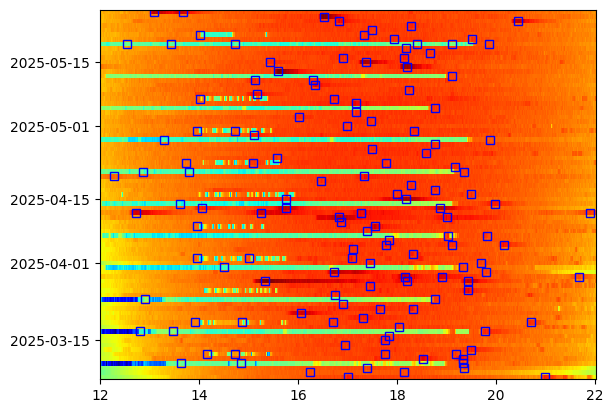

In [198]:
tdayh = np.linspace(12,22,piudfm.shape[1])
plt.pcolormesh(tdayh, piudfm.index, piudfm.values, cmap="jet", 
               )
plt.plot(xtime, ydate, marker="s", lw=0,markeredgecolor="blue",markerfacecolor="none")

In [199]:
len(xtime)

140

(1e-07, 0.001)

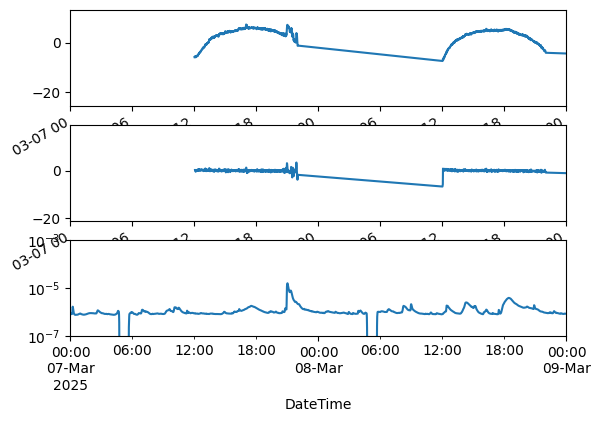

In [217]:
# derivative
dnaaday = naaday.diff(3)
ax = plt.subplot(311)
naaday.plot(ax=ax)
plt.xlim(dt.date(2025,3,7),dt.date(2025,3,9))

ax = plt.subplot(312)
dnaaday.plot(ax=ax)
plt.xlim(dt.date(2025,3,7),dt.date(2025,3,9))
ax = plt.subplot(313)
xrdata["GOES-16_long"].plot(ax=ax)
ax.set_yscale("log")
plt.xlim(dt.date(2025,3,7),dt.date(2025,3,9))
plt.ylim(1e-7, 1e-3)

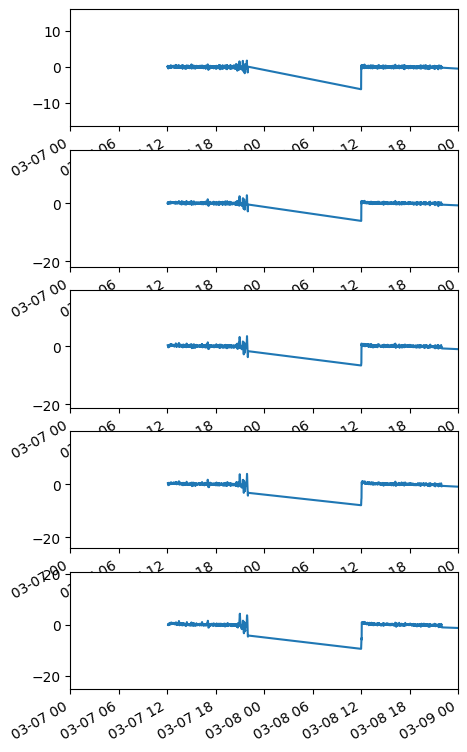

In [220]:
fig = plt.figure(figsize=(5,10))
n= 5
for i in range(1,n+1):
    dnaaday = naaday.diff(i)
    ax = plt.subplot(n,1,i)
    dnaaday.plot(ax=ax)
    plt.xlim(dt.date(2025,3,7),dt.date(2025,3,9))

In [204]:
np.concat((idx1,idx2)).shape


(369,)

In [226]:
naaday.to_csv("PIU_070325-260525_12-22h.csv")

In [ ]:
dnaaday.to_csv("PIU__070325-260525_12-22h.csv")

In [223]:
df = pd.DataFrame(dnaaday)

In [224]:
df["state"] = 1

In [225]:
df

,NAA-filt,state
2025-03-07 12:00:00,NaN,1
2025-03-07 12:01:00,NaN,1
2025-03-07 12:02:00,NaN,1
2025-03-07 12:03:00,NaN,1
2025-03-07 12:04:00,NaN,1
...,...,...
2025-05-26 21:57:00,-0.599535,1
2025-05-26 21:58:00,-0.459017,1
2025-05-26 21:59:00,-1.093475,1
2025-05-26 22:00:00,0.019958,1
